In [1]:
# Source
# https://codefying.com/2018/12/21/introduction-to-correspondence-analysis/
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

In [2]:
# getting the data
authors = ["Charles Darwin", "Rene Descartes","Thomas Hobbes", "Mary Shelley", "Mark Twain"]
initials=['CD1','CD2','CD3','RD1','RD2','RD3','TB1','TB2','TB3','MS1','MS2','MS3','MT1','MT2','MT3']
chars=["B", "C", "D", "F", "G", "H", "I", "L", "M", "N","P", "R", "S", "U", "W", "Y"]

In [3]:
sampleCrosstab=[[34, 37, 44, 27, 19, 39, 74, 44, 27, 61, 12, 65, 69,22, 14, 21],
                [18, 33, 47, 24, 14, 38, 66, 41, 36,72, 15, 62, 63, 31, 12, 18],
                [32, 43, 36, 12, 21, 51, 75, 33, 23, 60, 24, 68, 85,18, 13, 14],
                [13, 31, 55, 29, 15, 62, 74, 43, 28,73, 8, 59, 54, 32, 19, 20],
                [8, 28, 34, 24, 17, 68, 75, 34, 25, 70, 16, 56, 72,31, 14, 11], 
                [9, 34, 43, 25, 18, 68, 84, 25, 32, 76,14, 69, 64, 27, 11, 18],
                [15, 20, 28, 18, 19, 65, 82, 34, 29, 89, 11, 47, 74,18, 22, 17], 
                [18, 14, 40, 25, 21, 60, 70, 15, 37,80, 15, 65, 68, 21, 25, 9],
                [19, 18, 41, 26, 19, 58, 64, 18, 38, 78, 15, 65, 72,20, 20, 11], 
                [13, 29, 49, 31, 16, 61, 73, 36, 29,69, 13, 63, 58, 18, 20, 25],
                [17, 34, 43, 29, 14, 62, 64, 26, 26, 71, 26, 78, 64, 21, 18, 12],
                [13, 22, 43, 16, 11, 70, 68, 46, 35,57, 30, 71, 57, 19, 22, 20],
                [16, 18, 56, 13, 27, 67, 61, 43, 20, 63, 14, 43, 67,34, 41, 23], 
                [15, 21, 66, 21, 19, 50, 62, 50, 24, 68, 14, 40, 58, 31, 36, 26],
                [19, 17, 70, 12, 28, 53, 72, 39, 22, 71, 11, 40, 67,25, 41, 17]]
df = pd.DataFrame(np.array(sampleCrosstab))
df.shape

(15, 16)

In [4]:
display(len(authors), len(chars))

5

16

## Correspondent matrix = frequency

In [5]:
# Calculating R_square, manually
grandTotal = np.sum(sampleCrosstab)
correspondenceMatrix = np.divide(sampleCrosstab,grandTotal) # divide the original by grand total

rowTotals = np.sum(correspondenceMatrix, axis=1)
columnTotals = np.sum(correspondenceMatrix, axis=0)
 
independenceModel = np.outer(rowTotals, columnTotals)
 
#Calculate manually
chiSquaredStatistic = grandTotal*np.sum(np.square(correspondenceMatrix-independenceModel)/independenceModel)
print(chiSquaredStatistic)
print(correspondenceMatrix.shape)

448.49666422103445
(15, 16)


In [9]:
display(grandTotal)
display(correspondenceMatrix.shape)
display(independenceModel.shape)

8994

(15, 16)

(15, 16)

In [12]:
# it turns out that we can calculate this through scipy
statistic, prob, dof, ex = chi2_contingency(sampleCrosstab)
print(statistic)
print(np.round(prob, decimals=2))

448.49666422103445
0.0


## Calculate X-square statistics

## Check the sum of each row

In [13]:
# pre-calculate normalised rows
# each row
norm_correspondenceMatrix = np.divide(correspondenceMatrix,rowTotals[:, None])

# Each row has a sum of 1
np.sum(norm_correspondenceMatrix[0])

1.0

In [ ]:
chiSquaredDistances = np.zeros((correspondenceMatrix.shape[0],correspondenceMatrix.shape[0]))
norm_columnTotals = np.sum(norm_correspondenceMatrix, axis=0)

# Calculate Euclidean distances per row
for row in range(correspondenceMatrix.shape[0]):
    chiSquaredDistances[row]=np.sqrt(np.sum(np.square(norm_correspondenceMatrix
                                                        -norm_correspondenceMatrix[row])/columnTotals, axis=1))

In [18]:
# Save distances to the DataFrame for easier díplay
dfchiSquaredDistances = pd.DataFrame(data=np.round(chiSquaredDistances*100).astype(int))
author_samples = [this_author + "_" + str(this_int + 1) for this_author in authors for this_int in range(3)]
dfchiSquaredDistances.columns = author_samples
dfchiSquaredDistances

,Charles Darwin_1,Charles Darwin_2,Charles Darwin_3,Rene Descartes_1,Rene Descartes_2,Rene Descartes_3,Thomas Hobbes_1,Thomas Hobbes_2,Thomas Hobbes_3,Mary Shelley_1,Mary Shelley_2,Mary Shelley_3,Mark Twain_1,Mark Twain_2,Mark Twain_3
0,0,21,24,29,35,33,36,39,34,27,31,38,43,38,42
1,21,0,32,20,26,24,32,33,28,23,26,31,40,33,41
2,24,32,0,40,34,35,37,39,35,37,29,37,46,48,47
3,29,20,40,0,22,21,29,33,30,15,29,32,32,26,35
4,35,26,34,22,0,16,23,28,26,24,24,30,37,38,41
5,33,24,35,21,16,0,26,27,24,19,22,31,42,41,43
6,36,32,37,29,23,26,0,25,24,26,33,34,35,37,36
7,39,33,39,33,28,27,25,0,8,29,26,35,39,41,37
8,34,28,35,30,26,24,24,8,0,26,23,33,40,41,39
9,27,23,37,15,24,19,26,29,26,0,23,27,35,29,36


In [20]:
for i in range(3):
    display(np.sum(dfchiSquaredDistances.iloc[i,:]))

470

410

520

## Standardize residuals

In [24]:
# Reminder on the definition of correspondence matrix
#grandTotal = np.sum(sampleCrosstab)
#correspondenceMatrix = np.divide(sampleCrosstab,grandTotal) # divide the original by grand total
np.sum(correspondenceMatrix) # be design, the sum across all cells = 1

1.0

In [26]:
# Reminder on the definition of independence model
# rowTotals = np.sum(correspondenceMatrix, axis=1)
# columnTotals = np.sum(correspondenceMatrix, axis=0)
# independenceModel = np.outer(rowTotals, columnTotals)
display(independenceModel[0])
display(np.sum(independenceModel[0]))

array([0.0019499 , 0.00300389, 0.00523234, 0.00249948, 0.00209294,
       0.0065649 , 0.00801038, 0.00396755, 0.00324481, 0.00796521,
       0.0017918 , 0.00670794, 0.00746832, 0.00277051, 0.00246937,
       0.00197248])

0.06771180787191461

In [85]:
standardizedResiduals = np.divide((correspondenceMatrix - independenceModel),np.sqrt(independenceModel))
 
u,s,vh = np.linalg.svd(standardizedResiduals, full_matrices=False)

## Check SVD
https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
$$ A = USV^H$$
The 1D array s contains the singular values of a and u and vh are <b>unitary</b>. <br>

- The rows of $V^T$ are the eigenvectors of $A^{H}A$ and
- The columns of $U$ are the eigenvectors of $AA^{H}$.

In [89]:
print("shape of A ", correspondenceMatrix.shape)
print("shape of A ", standardizedResiduals.shape)
print("shape of U ", u.shape)
print("Shape of S ", len(s))
print("Why 15? Shouldn't it be 16? No. It is the smaller of row vs columns")

print("Shape of vh", vh.shape)

# Note that s is the list of the diagonal vectors, NOT a diagonal matrix

shape of A  (15, 16)
shape of A  (15, 16)
shape of U  (15, 15)
Shape of S  15
Why 15? Shouldn't it be 16? No. It is the smaller of row vs columns
Shape of vh (15, 16)


In [35]:
tmp = u.dot(np.diag(s)).dot(vh)
np.allclose(tmp, standardizedResiduals)

True

In [39]:
# U is not Upper or Lower matrix or anything
pd.DataFrame(np.round(u*100))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-14.0,54.0,12.0,31.0,-12.0,22.0,-12.0,-30.0,26.0,-26.0,8.0,-29.0,-4.0,34.0,26.0
1,-12.0,25.0,-21.0,21.0,-15.0,2.0,65.0,20.0,-11.0,28.0,-8.0,-8.0,41.0,-11.0,26.0
2,-28.0,43.0,51.0,-17.0,27.0,-16.0,-7.0,18.0,-2.0,14.0,-1.0,26.0,-18.0,-36.0,26.0
3,6.0,5.0,-43.0,23.0,3.0,-11.0,-7.0,-3.0,11.0,-44.0,-45.0,43.0,-11.0,-24.0,26.0
4,-13.0,-18.0,-17.0,-2.0,47.0,-30.0,26.0,-29.0,-7.0,-29.0,55.0,-7.0,2.0,-4.0,25.0
5,-22.0,-17.0,-25.0,11.0,21.0,-23.0,-18.0,50.0,29.0,27.0,-8.0,-24.0,-24.0,34.0,26.0
6,-1.0,-27.0,15.0,16.0,49.0,59.0,-2.0,-8.0,-34.0,6.0,-29.0,-1.0,5.0,11.0,26.0
7,-10.0,-45.0,29.0,12.0,-34.0,1.0,9.0,-5.0,17.0,-12.0,-10.0,-43.0,-18.0,-48.0,25.0
8,-16.0,-32.0,23.0,14.0,-34.0,4.0,14.0,-9.0,13.0,13.0,22.0,62.0,-6.0,34.0,25.0
9,-3.0,0.0,-29.0,6.0,-13.0,22.0,-58.0,-0.0,-2.0,25.0,38.0,6.0,33.0,-35.0,26.0


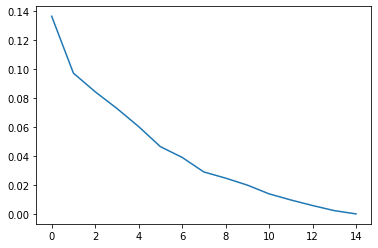

In [42]:
# Plotting the eigenvalues
# From PCA, the eigen-values is like the the variance of the Whole A^TA
import matplotlib.pyplot as plt
plt.plot(range(len(s)),s)

# Let's check the claim earlier
The rows of $𝑉^𝑇$ are the eigenvectors of $𝐴^{𝐻}𝐴$

In [71]:
# Note that standardized Residuals is not a square matrix
standardizedResiduals.shape

(15, 16)

In [48]:
A = standardizedResiduals.copy()
# aha is a square, symmetric matrix
aha = A.T.dot(A)

this_row = vh[0]
display(this_row)
tmp1 = this_row.dot(aha)
display(tmp1)
display(aha.dot(this_row))

# All the values of tmp1 is a multiple of this_row
# so this_row is an eigen vectors
display(this_row / tmp1)

array([-0.08440155, -0.2885937 ,  0.38556467, -0.18744171,  0.18322542,
       -0.00945929, -0.09392943,  0.26655119, -0.16273999, -0.0356782 ,
       -0.18016201, -0.39630954, -0.09264571,  0.16671108,  0.56619303,
        0.19502576])

array([-0.00156842, -0.00536289,  0.00716488, -0.0034832 ,  0.00340485,
       -0.00017578, -0.00174547,  0.00495328, -0.00302417, -0.000663  ,
       -0.00334792, -0.00736455, -0.00172162,  0.00309796,  0.01052147,
        0.00362413])

array([-0.00156842, -0.00536289,  0.00716488, -0.0034832 ,  0.00340485,
       -0.00017578, -0.00174547,  0.00495328, -0.00302417, -0.000663  ,
       -0.00334792, -0.00736455, -0.00172162,  0.00309796,  0.01052147,
        0.00362413])

array([53.81310498, 53.81310498, 53.81310498, 53.81310498, 53.81310498,
       53.81310498, 53.81310498, 53.81310498, 53.81310498, 53.81310498,
       53.81310498, 53.81310498, 53.81310498, 53.81310498, 53.81310498,
       53.81310498])

We know that U.S.VH = A
What if I use only one components

In [78]:
display(aha.shape)
display(vh.shape)

(16, 16)

(15, 16)

# Calculating Row scores

$$R = \delta_r \cdot U \cdot S$$
- where $U$ and $S$ are the left singular vectors matrix and singular values on the diagonal matrix from SVD. 
- The $\delta_{r}$ is <b>diagonal</b> matrix made of the <b>reciprocals</b> of the square roots of the row totals.

In [77]:
# The original cross tab data
display(df.shape)
print("{} is the number of observations".format(df.shape[0]))
print("{} is the number of columns, equal to the length of characters list.".format(df.shape[1], ))


# The standardized residuals
display(standardizedResiduals.shape)
print("Standardized residuals have the same shape as original df.")

# The reconstructed rowScores
deltaR = np.diag(np.divide(1.0,np.sqrt(rowTotals)))
rowScores=np.dot(np.dot(deltaR,u),np.diag(s))
display(rowScores.shape)

(15, 16)

15 is the number of observations
16 is the number of columns, equal to the length of characters list.


(15, 16)

Standardized residuals have the same shape as original df.


(15, 15)

In [72]:
dfFirstTwoComponents = pd.DataFrame(data=[l[0:2] for l in rowScores], 
                                    columns=['X', 'Y'], 
                                    index=initials)
display(dfFirstTwoComponents.shape) 
display(dfFirstTwoComponents)

(15, 2)

,X,Y
CD1,-0.070977,0.200620
CD2,-0.062109,0.094512
CD3,-0.148509,0.158889
RD1,0.030697,0.019028
RD2,-0.069552,-0.068382
RD3,-0.115119,-0.063805
TB1,-0.006890,-0.103594
TB2,-0.053382,-0.170423
TB3,-0.083822,-0.121758
MS1,-0.016408,0.001383


# Note
Almost  every matrix can be decomposed as SVD, but when you decompose the residuals matrix, I guess it should make more sense.

# Back to visualization
entirely based on the first two components, just a lot of codes to make it look pretty

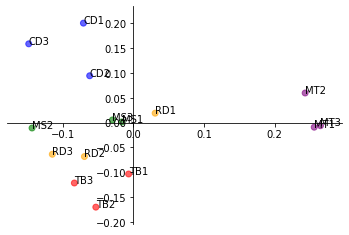

In [107]:
color_list = []
for this_color in ['blue','orange','red','green','purple']:
    color_list = color_list + [this_color] * 3


fig, ax = plt.subplots()
ax = ax.scatter(dfFirstTwoComponents.iloc[:,0], 
                 dfFirstTwoComponents.iloc[:,1],
               c= color_list, alpha=0.6)

for i in range(len(dfFirstTwoComponents)):
    plt.gca().annotate(dfFirstTwoComponents.index[i], 
                (dfFirstTwoComponents.iloc[i,0],
                 dfFirstTwoComponents.iloc[i,1]))
    
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)